In [6]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 49)

In [7]:
# Importing Data

house_price = pd.read_excel("C:/Users/10553/OneDrive - Indian School of Business/Desktop/AMPBA/SA-2/House_price.xlsx")

print(house_price.shape)

(5000, 25)


In [25]:
# Preview Dataset
house_price.head()

,Id,Date,price,bedrooms,Bedroom Category,bathrooms,Bathroom group,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Distance,Expensive
0,3125,20150213T000000,269100,3,0-4,2.50,>=2 & <=3,2190,7904,2.0,NO,0,3,8,2190,0,1995,0,98092,47.2617,-122.210,2190,7669,24.422199,NO
1,10559,20140516T000000,445000,3,0-4,2.25,>=2 & <=3,1990,7340,2.0,NO,0,3,8,1990,0,1984,0,98072,47.7579,-122.141,2180,11223,13.876083,NO
2,8819,20140826T000000,400000,3,0-4,1.75,<2,1730,9211,1.0,NO,0,3,8,1730,0,1961,0,98125,47.7149,-122.322,1440,9211,7.615336,NO
3,1197,20141226T000000,215000,4,0-4,2.25,>=2 & <=3,1900,9600,1.0,NO,0,4,7,1900,0,1967,0,98031,47.4208,-122.200,2040,9600,14.188716,NO
4,16507,20140611T000000,657500,4,0-4,2.75,>=2 & <=3,4140,24190,2.0,NO,0,3,11,4140,0,2002,0,98092,47.3062,-122.150,3950,24190,22.370637,NO


## 1. EDA to identify relationship between House Prices & Independent variables

We have tried to do the following for the analysis :

* **Univariate Analysis** - (One Variable Analysis)

* **Bivariate Analysis** (Numerical vs Target(Dependent) Variable) 
* **Bivariate Analysis** (Categorical vs Target(Dependent) Variable)

* **Missing Values and their Imputation**

* **Outlier Analysis and their Treatment**

* **Feature Engineering** -
**The Objective of creating new features is able to find the correct pattern between the predictors and the target.**

* **Data Preprocessing Step**

In [26]:
# Numerical Variables
num_vars = ['price', 'sqft_living', 'sqft_lot',
            'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
            'Distance']

In [34]:
# Summary of the Numerical Variables
house_price.loc[:, num_vars].describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Distance
count,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.394607e+05,2076.191400,1.566071e+04,1790.483000,285.708400,1984.730800,13099.041000,11.295701
std,3.553443e+05,929.067912,4.519616e+04,834.248767,440.287324,681.947383,31407.633239,6.541624
min,7.800000e+04,420.000000,6.380000e+02,420.000000,0.000000,690.000000,886.000000,0.719543
25%,3.230000e+05,1410.000000,5.000000e+03,1187.500000,0.000000,1480.000000,5040.000000,5.969902
50%,4.550000e+05,1900.000000,7.553500e+03,1560.000000,0.000000,1830.000000,7560.000000,10.167894
75%,6.450000e+05,2560.000000,1.062500e+04,2220.000000,530.000000,2370.000000,10000.000000,15.336460
max,4.000000e+06,7850.000000,1.164794e+06,7850.000000,3260.000000,6210.000000,858132.000000,44.722912


## Conclusion:

* Price (which is the Dependent variable) is highly skewed. 

* The minimum living area (_or carpet area_) (**sqft_living**) is 420 sq.ft. with an average living area of 1,900 sq.ft and maximum of 7,850 sq.ft.

**The minimum area of houses is 886 sq feet with an average area of 7580 sq.ft. However, the max area is 858132 sqft.**

* A 600 sq.ft house typically represents a low income house or a budget friendly house for students, single parents or young couples.

* Larger housing space of 7580 sq.ft represents large housing capacity, and thus for large families or high-income indiividuals.

* The houses with the largest area of 858132 sq.ft represents luxurious houses such as bungalows - with enormous living spaces and lots of sophisticated arrangement.

* The Basements are **0** , which is valid as it is not a necessity for ALL houses to have a basement.

* The minimum Distance is within 1 miles where as the average distance is 11.69 miles followed by median distance of 10.35 miles and the max distance is 48 miles. This explains that the houses close to down town would be pricier than the ones which are in outskirts.

## Univariate Analysis - Numerical Variables

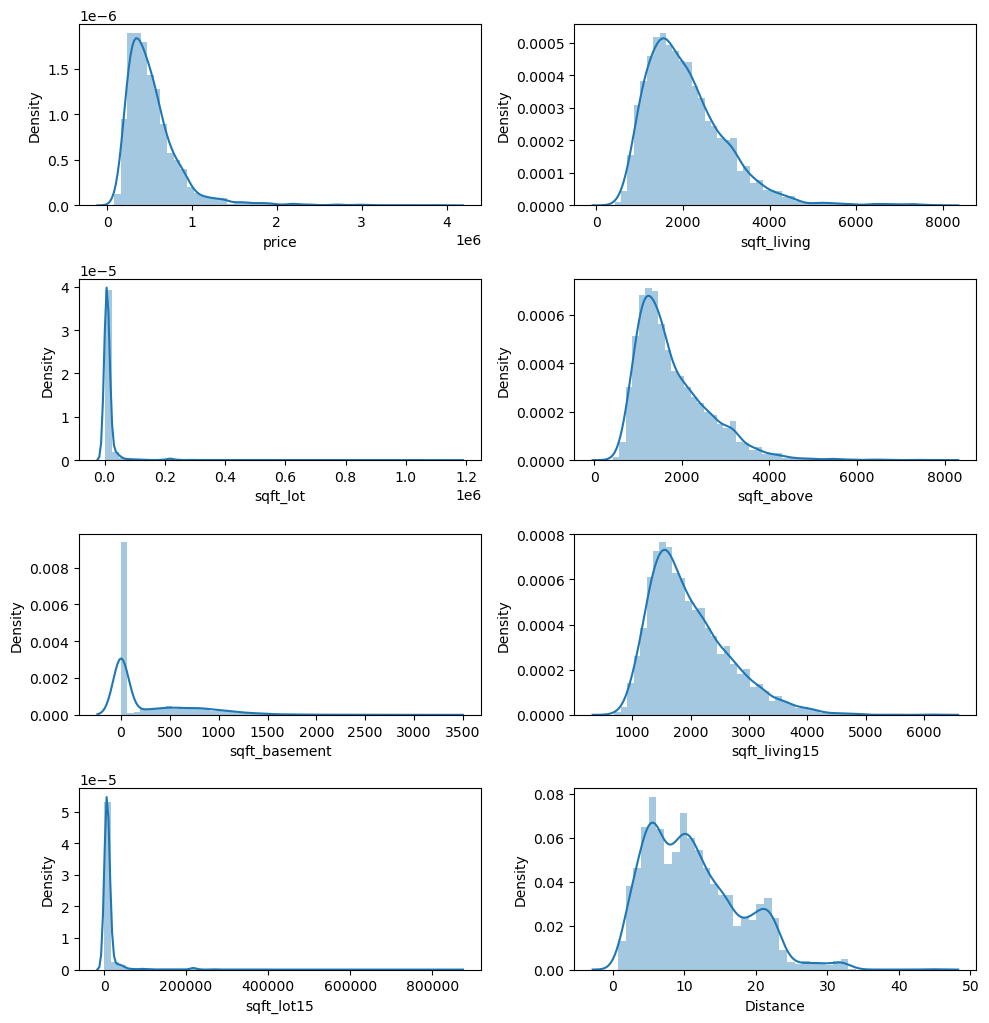

In [36]:
nrows = 6 # Defining the Dimensions of Plot
ncols = 2
repeater = 1

plt.figure(figsize=(10, 15)) # Plot Figure Size

# Loop to Create the Plots
for i in num_vars:
    plt.subplot(nrows, ncols, repeater) # Creates subplots
    sns.distplot(house_price.loc[:, i]) # Univariate (Num): distplot
    repeater+=1
    
plt.tight_layout()
plt.show()

### Inference:

Since the most of the variables involve square feet or price & distance, we clearly see that the variables are positively skewed.

### Univariate Analysis - Categorical Variables

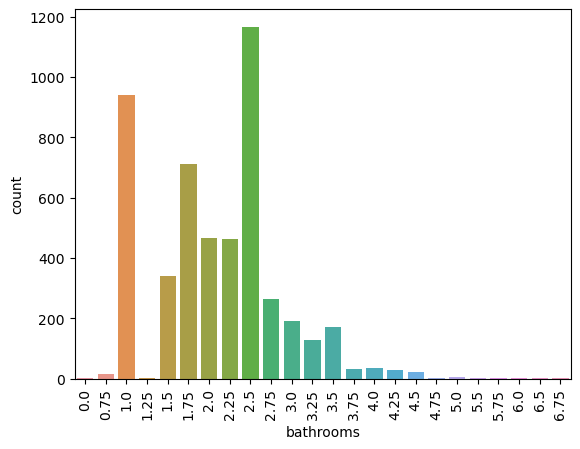

In [37]:
sns.countplot(house_price.bathrooms)
plt.xticks(rotation=90)
plt.show()

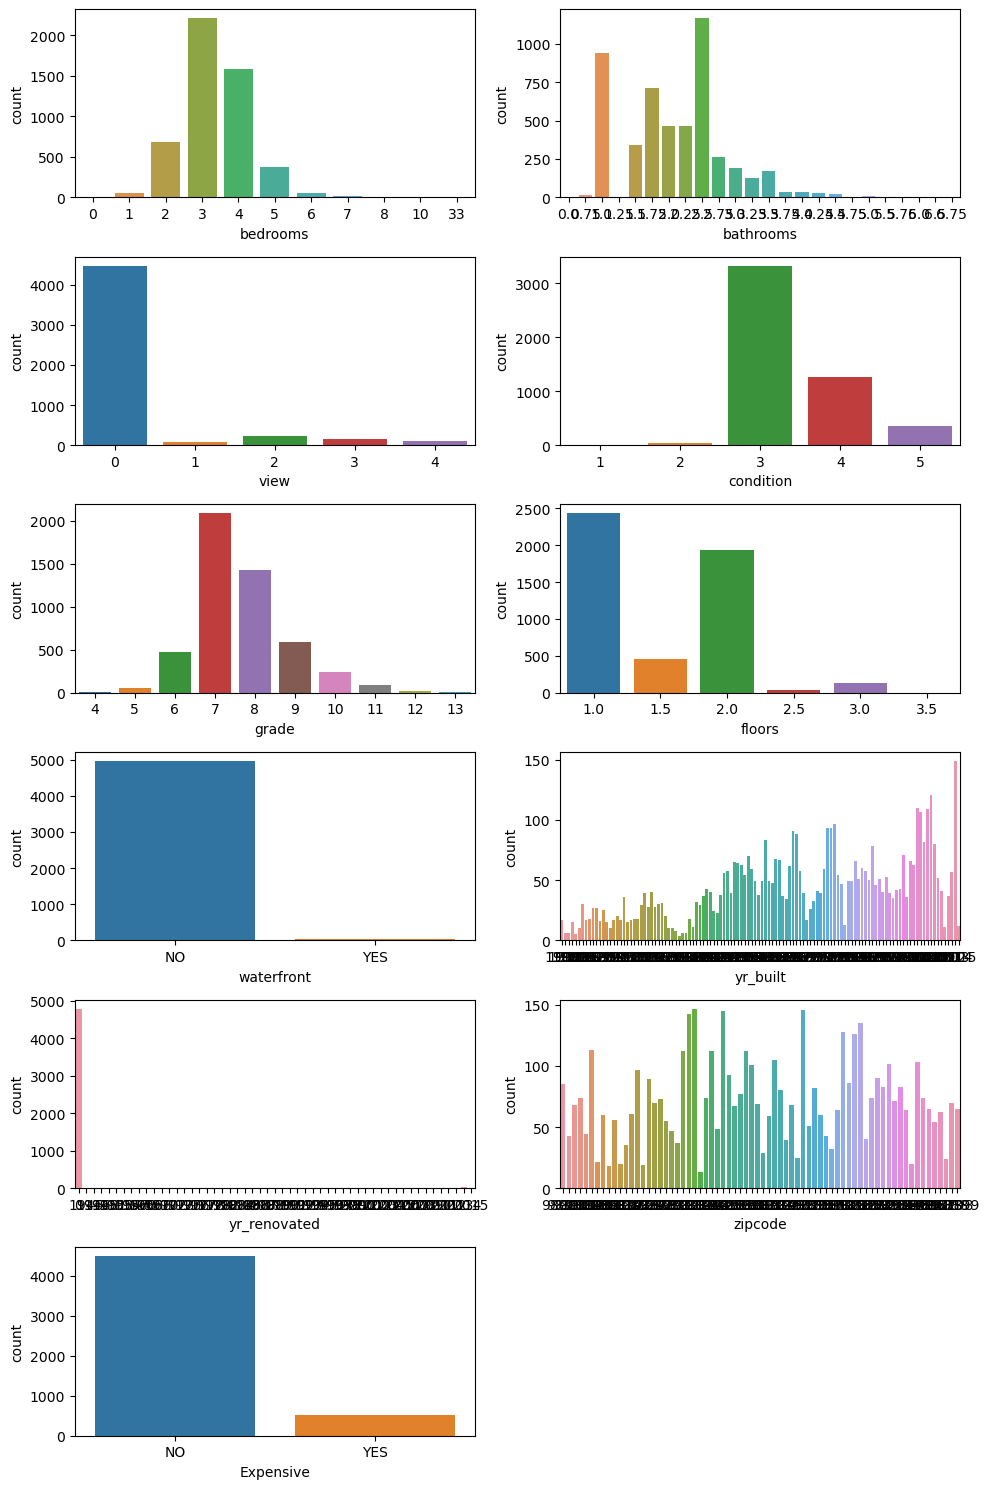

In [39]:
# Categorical Variables

cat_vars = ['bedrooms', 'bathrooms','view', 'condition', 'grade', 'floors', "waterfront", "yr_built", "yr_renovated", 
           "zipcode", "Expensive"]

nrows = 6
ncols = 2
iterator = 1

plt.figure(figsize=(10, 15))

for i in cat_vars:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(house_price.loc[:, i])
    iterator+=1
    
    
plt.tight_layout()
plt.show()

### Conclusion:


Note: We have considered Bathroom & Bedroom to be **Categorical Variables** - as they are _discrete variables_. it is likely that any house can likely have either 2 bedrooms/ 2 bathrooms or 2/3 bed/bathrooms. Its **impossible** to have 2.25 bathrooms or bedrooms.

* Most houses have 3 bedrooms and 2.5 bathrooms - and a minimum of 1 bathroom.

* _View Count 0_ has the highest type of views - as it maybe the default view of the houses.

* Most Common Condition is 3 in the dataset - Representing the _urgency of repairs_.

* Most Properties in the dataset have good quality of constructions - as is visible by the grade (_most of the Property have 7 & 8 grade types which represents decently good construction_).

* Most houses are G+1 type, but a few have a 2nd floor as well.

* The renovation year is mostly 0 as most properties have a high quality of construction (_thus requiring less renovation work_)

* There is no pattern emerging for **yr_built** and **zipcode**, however, we have used these in creating new features for  feature engineering analysis.

* Vew Few houses are expensive.

## Bivariate Analysis - Num vs Num (Predictor vs Dependent/Target Variable)

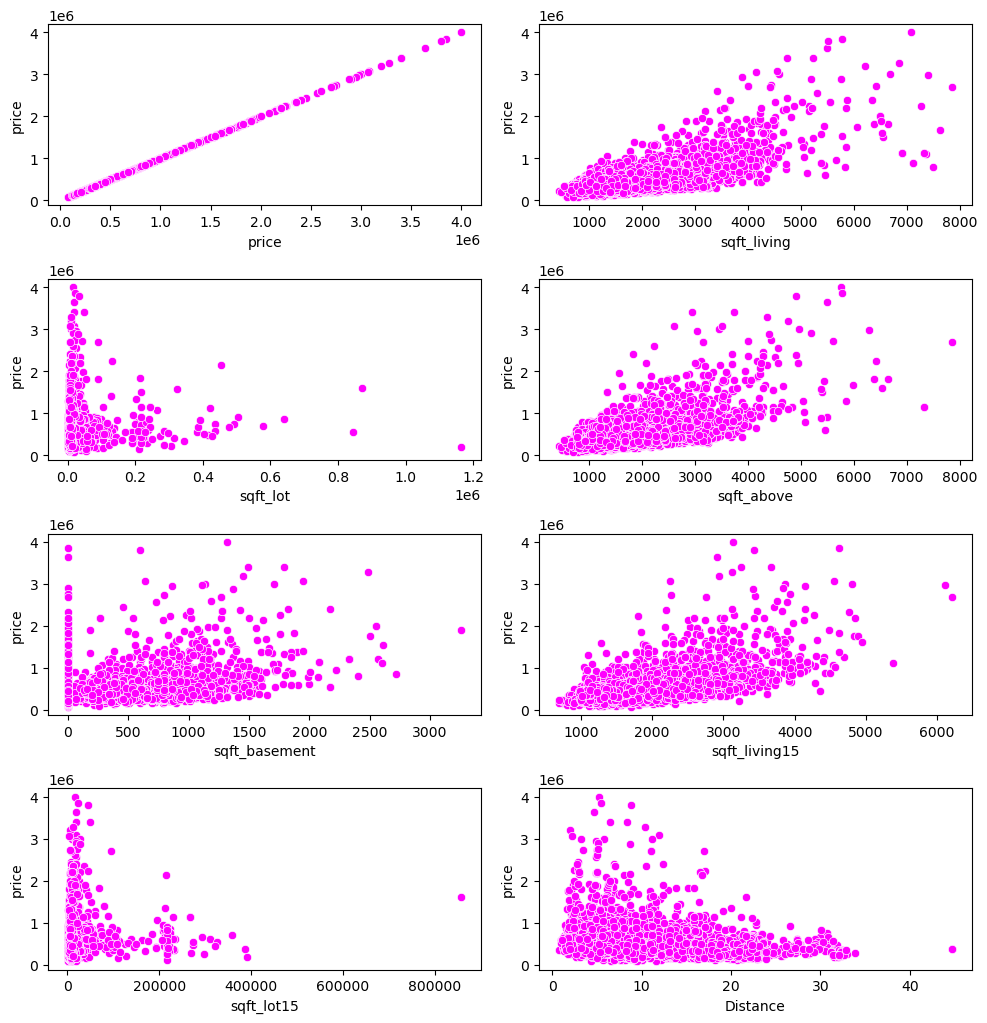

In [40]:
num_vars = ['price','sqft_living', 'sqft_lot',
            'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
            'Distance']

nrows = 6 # Dimensions of the Plot
ncols = 2
repeater = 1

plt.figure(figsize=(10, 15)) # Plot Figure Size

for i in num_vars:
    plt.subplot(nrows, ncols, repeater) # Creates subplots
    sns.scatterplot(house_price.loc[:, i], house_price.price, color = "magenta")
    repeater+=1
    
plt.tight_layout()
plt.show()

### Conclusion:

* `sqft_living`,`sqft_living15`, `sqft_above` are some of the predictors that have displayed heteroskedastic patterns with the target variable (*price*).

* The dataset indicates presence of outliers. We shall try and remove these using Winsorization Technique.

* Linearity is displayed by very few variables with the target. It is likely that these variables would have a very low correlation with the target variable.

## Bivariate Analysis - Cat vs Num (Dependent/Target Variable)

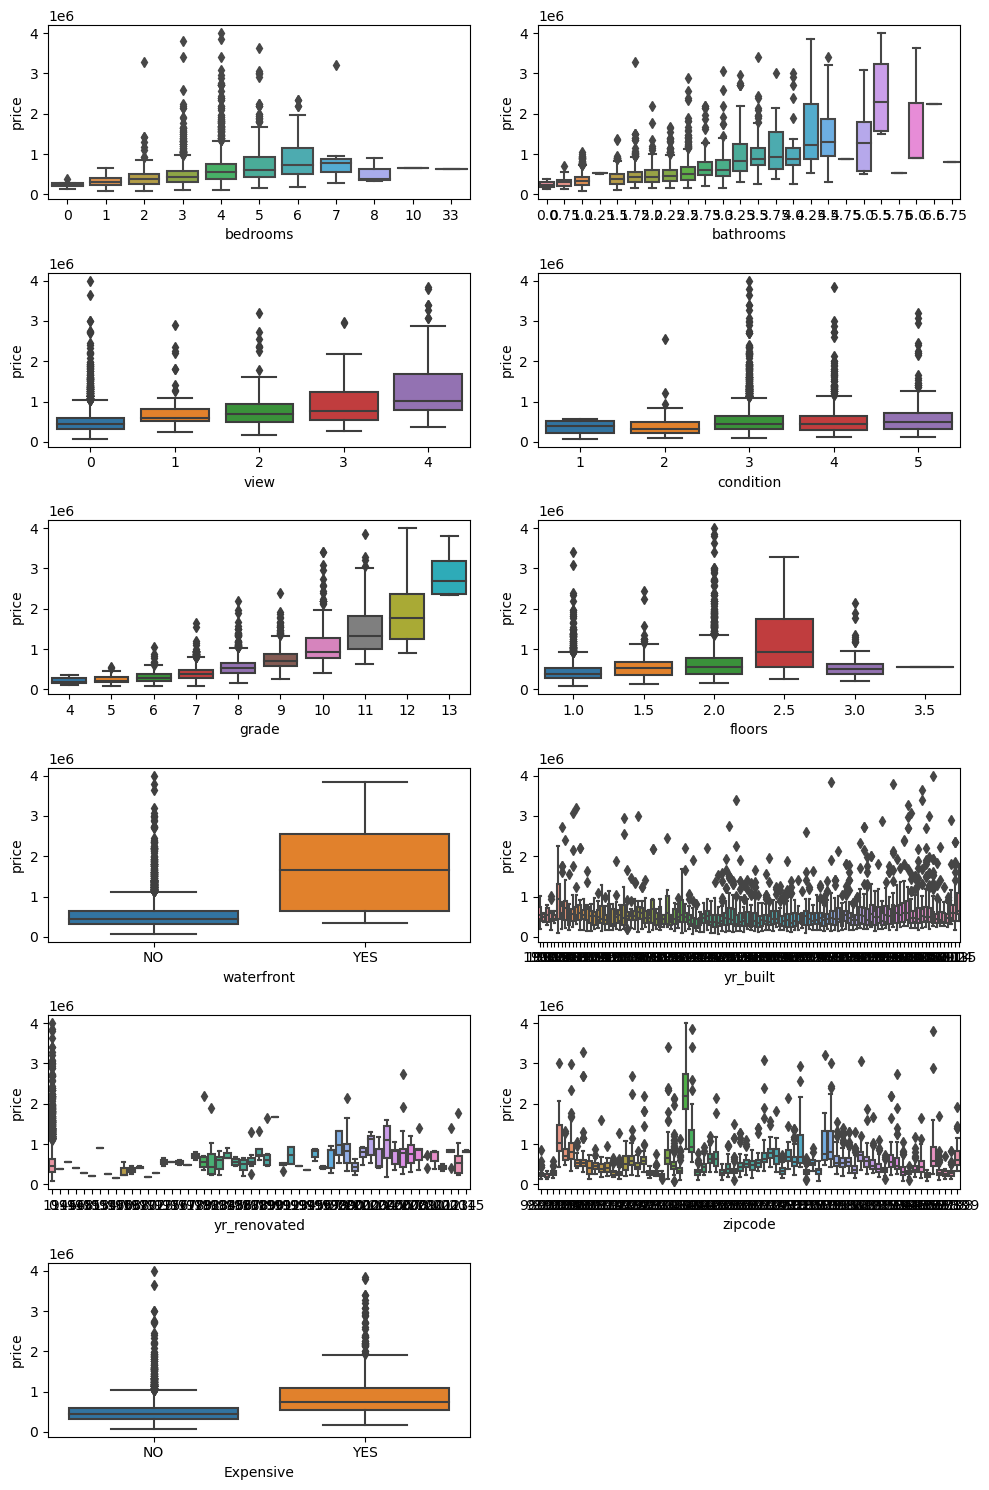

In [41]:
# Categorical vs Numerical

cat_vars = ['bedrooms', 'bathrooms','view', 'condition', 'grade', 'floors', "waterfront", "yr_built", "yr_renovated", 
           "zipcode", "Expensive"]

nrows = 6
ncols = 2
iterator = 1

plt.figure(figsize=(10, 15))

for i in cat_vars:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(house_price.loc[:, i], house_price.price) #boxplot...
    iterator+=1
    
    
plt.tight_layout()
plt.show()

### Conclusion:

* `bedrooms` varibale has a very interesting pattern with the target variable (_price_). The price of the houses are directly proportional to the number of bedrooms in the property. 

* `bathroom` has a very interesting pattern with the target variable (price). Interestingly, the prices of the porerty is directly dependant on the no. of bathrooms in the property - very likely due to the number of bedrooms.

* `view` number-2 has outlier where as `View` number-4 is pricier than the rest. As we do not know the definition of views here, we cannot infer from the statistical findings.

* `condition` number-3 is pricier than the rest. A well built house will not require repair, and thus, would be costlier than others.

* `floor` number-2 is costlier than others. Thus, houses with 2nd storey is desired by residents of this neighbourhood. Moreover, in some properties, the price varies with the floor.

* `expensive==YES` would be pricier than the rest.

_Note: There are no visible/logical patterns for zipcode, yr_built and yr_renovated._

### Correlation Plot - Heatmap

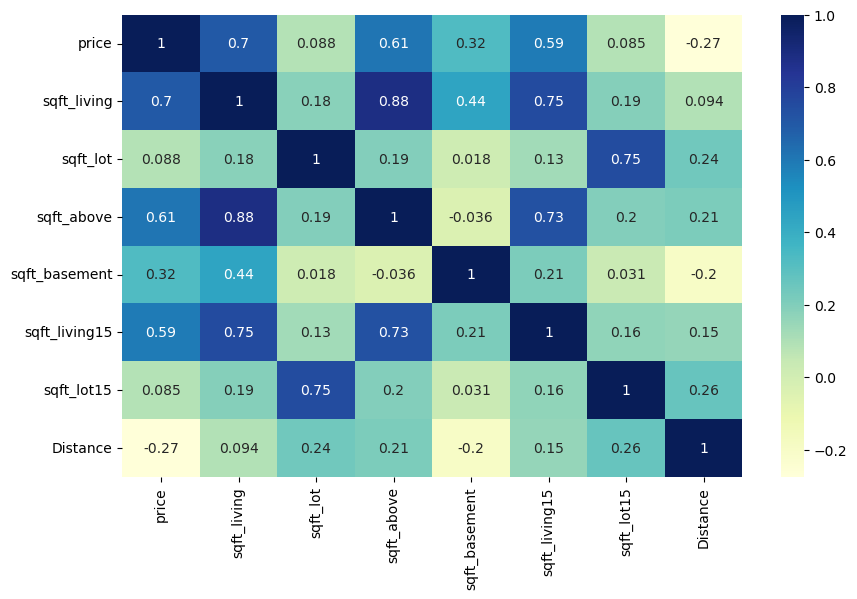

In [42]:
plt.figure(figsize=(10, 6))

sns.heatmap(house_price.loc[:, num_vars].corr(), annot = True, cmap = "YlGnBu")
plt.show()

## Conclusion:

* It is evident that `Distance` is negatively correlated with `price`. This is typcal for cities in developed countries, where suburbs are expensive than the city centre areas.

* `sqft_living`, `sqft_above` followed by `sqft_living15`, `sqft_basement` have a very high correlation with the target variable (_price_)

* `sqft_lot` and `sqft_lot15` have a very low correlation with the target variable.

In [43]:
# Checking Missing Data
house_price.isnull().sum()

Id                  0
Date                0
price               0
bedrooms            0
Bedroom Category    4
bathrooms           0
Bathroom group      0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
Distance            0
Expensive           0
dtype: int64

_Conclusion: It is evident that the dataset has no missing values_

### Outlier Identification & Removal

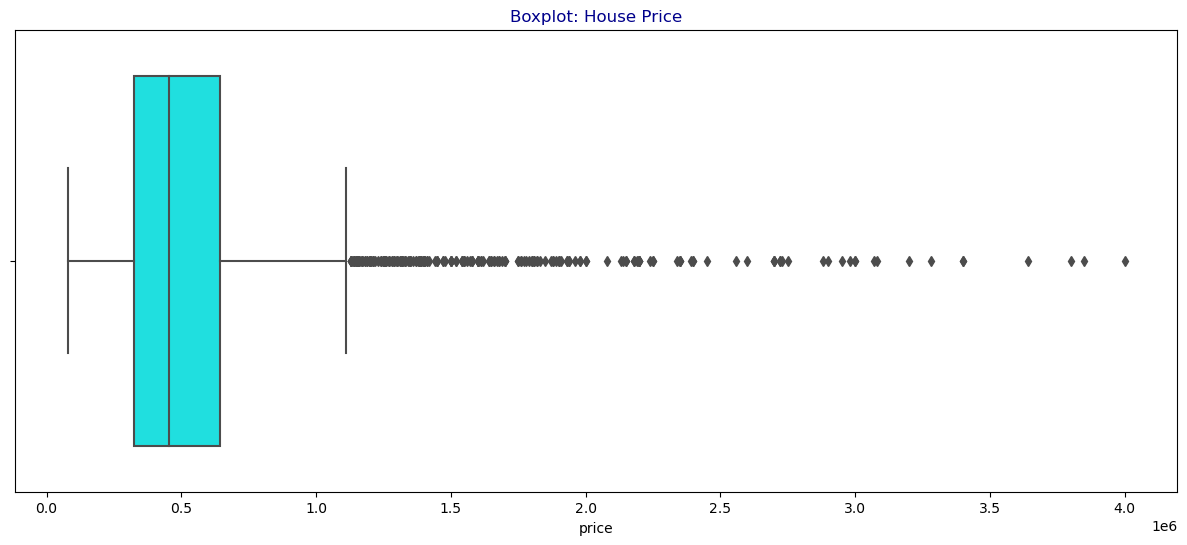

In [44]:
# Checking Outliers in the Target Variable
plt.figure(figsize=(15, 6))
sns.boxplot(house_price.price, color = "cyan")
plt.title("Boxplot: House Price", color = "darkblue")
plt.show()

**_Inference: Clearly there are outliers in the house-prices._**

### IQR Method vs Winsorization

Now we will attempt to remove the Outliers from the data basis IQR Method.

In [45]:
# Winsorization
from scipy.stats.mstats import winsorize

num = house_price.loc[:, num_vars]

for column in num:
    winsorized_data = winsorize(num[column], limits = (0.10, 0.10))
    house_price[column+"_winsorized"] = winsorized_data

In [196]:
print(house_price)

         Id             Date   price  bedrooms Bedroom Category  bathrooms  \
0      3125  20150213T000000  269100         3              0-4       2.50   
1     10559  20140516T000000  445000         3              0-4       2.25   
2      8819  20140826T000000  400000         3              0-4       1.75   
3      1197  20141226T000000  215000         4              0-4       2.25   
4     16507  20140611T000000  657500         4              0-4       2.75   
...     ...              ...     ...       ...              ...        ...   
4995   4696  20150209T000000  305000         3              0-4       2.50   
4996   6551  20150328T000000  348000         3              NaN       2.50   
4997  11488  20141020T000000  470000         3              NaN       2.50   
4998    959  20141021T000000  206600         3              NaN       2.00   
4999  10556  20150120T000000  445000         3              NaN       2.50   

     Bathroom group  sqft_living  sqft_lot  floors waterfront  

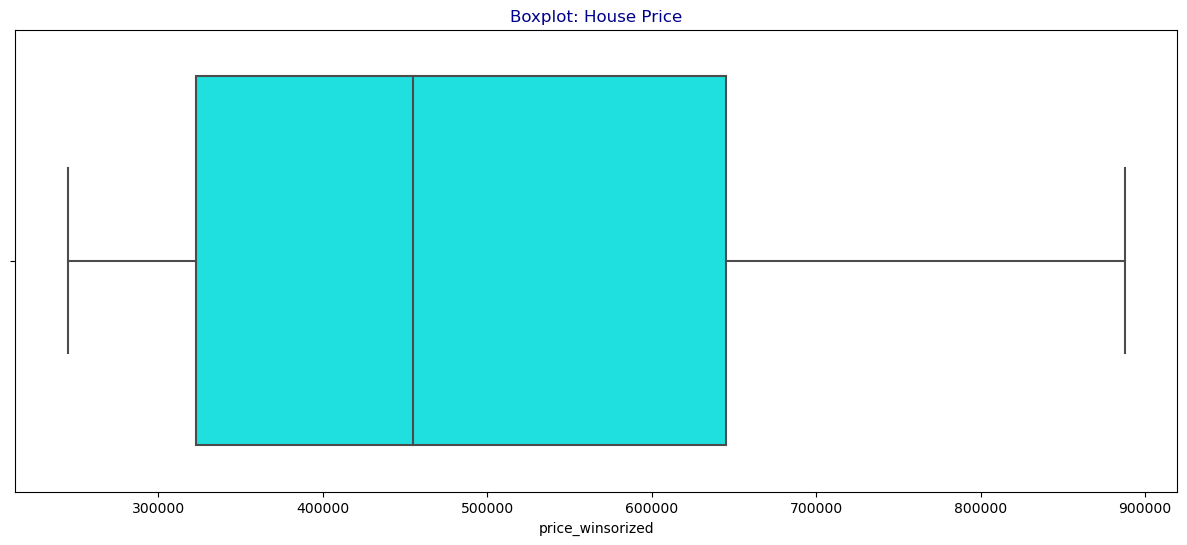

In [46]:
# Checking Outliers in WINSORIZED Target Var
plt.figure(figsize=(15, 6))
sns.boxplot(house_price.price_winsorized, color = "cyan")
plt.title("Boxplot: House Price", color = "darkblue")
plt.show()

### checking the correlation post winsorizartion

<AxesSubplot:>

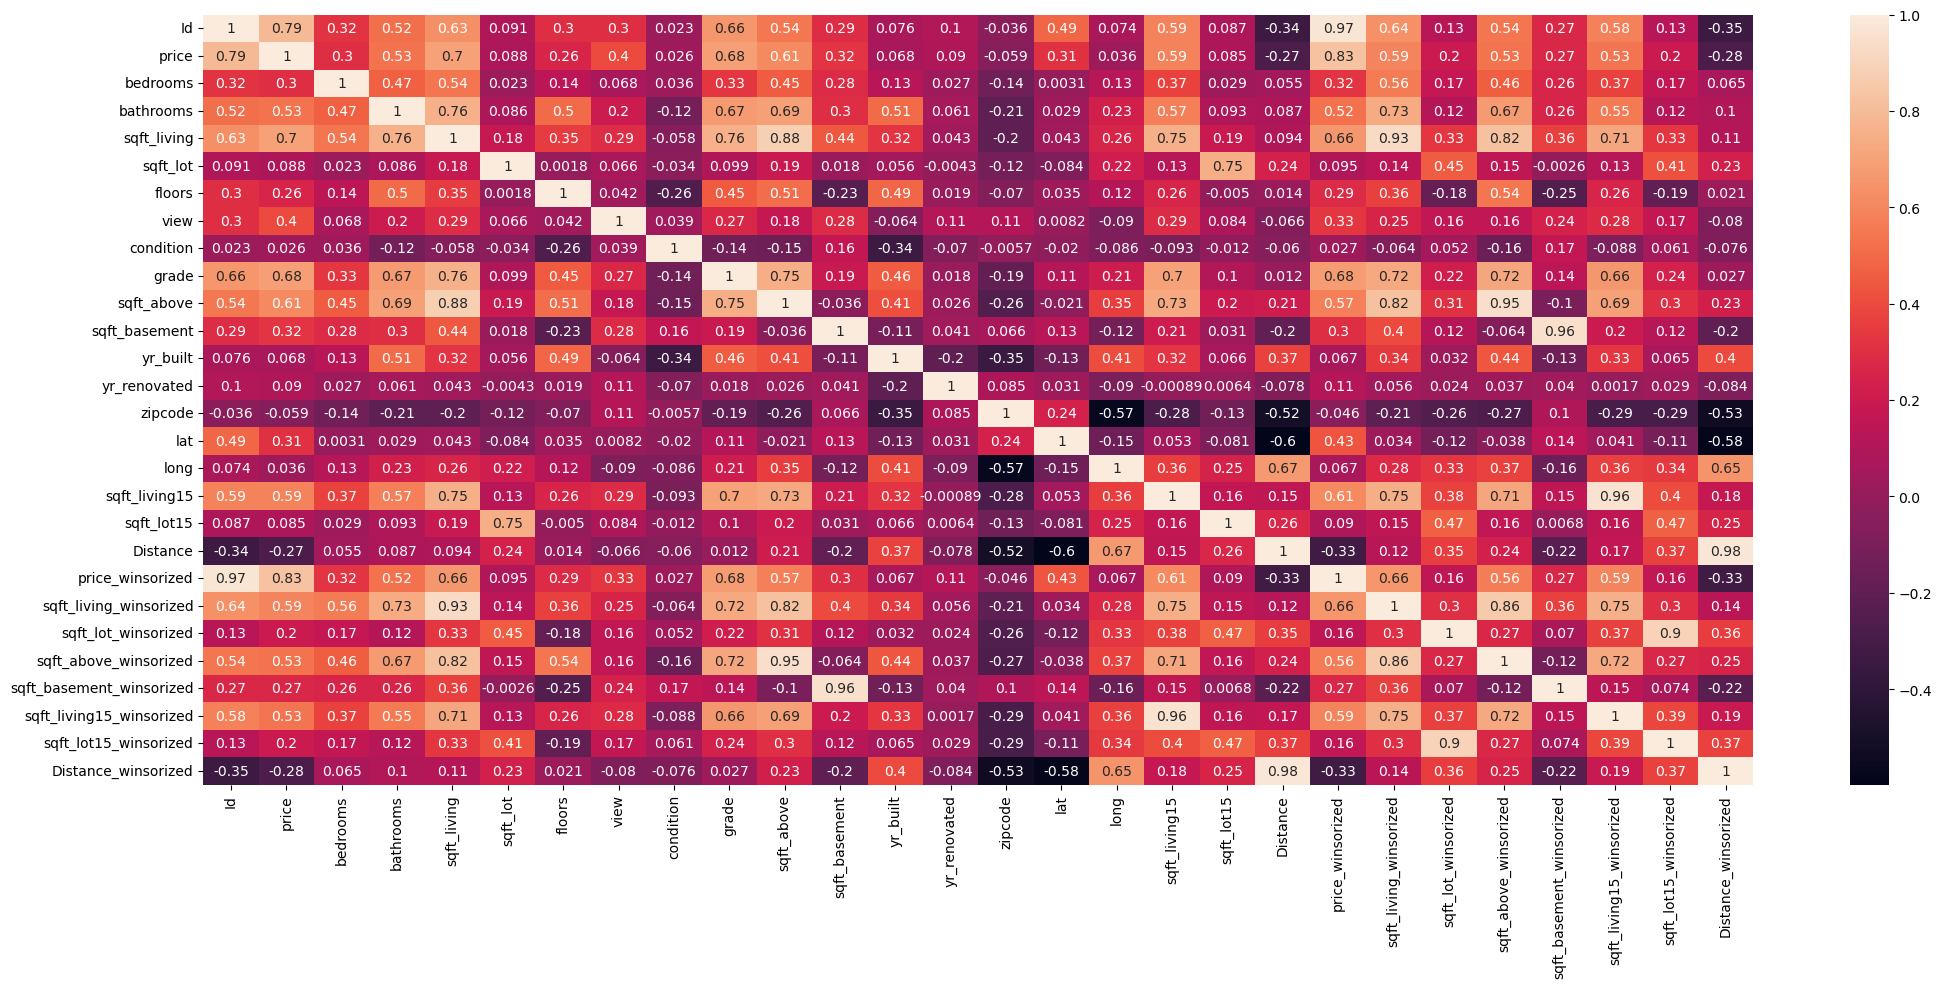

In [47]:
plt.figure(figsize = (25, 10))
sns.heatmap(house_price.corr(), annot = True)

Now we see that the Correlation with `Sqft Lot` & `Sqft_Lot15` has increased post Winsorization.

### Feature Engineering

In [48]:
# Open Area will be = sqft_lot - sqft_living
house_price["open_area"] = house_price["sqft_lot_winsorized"] - house_price["sqft_living_winsorized"]

#### ZipCode

In [49]:
house_price.zipcode.unique()

array([98092, 98072, 98125, 98031, 98074, 98144, 98059, 98006, 98005,
       98011, 98065, 98053, 98126, 98040, 98052, 98024, 98122, 98027,
       98166, 98115, 98155, 98112, 98117, 98103, 98118, 98038, 98133,
       98023, 98028, 98058, 98029, 98033, 98146, 98178, 98198, 98136,
       98039, 98022, 98004, 98019, 98116, 98106, 98008, 98045, 98034,
       98168, 98001, 98010, 98042, 98032, 98119, 98102, 98107, 98199,
       98014, 98148, 98003, 98056, 98105, 98030, 98055, 98077, 98075,
       98007, 98002, 98177, 98108, 98109, 98188, 98070], dtype=int64)

In [50]:
house_price.groupby("zipcode")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
98001,85.0,2.701375e+05,101887.488548,139000.0,206000.0,257000.0,292500.0,850000.0
98002,43.0,2.380895e+05,47351.643706,142500.0,196000.0,248500.0,268975.0,335900.0
98003,68.0,2.853601e+05,75162.107973,160000.0,236000.0,274000.0,325000.0,583000.0
98004,74.0,1.170676e+06,460655.432639,425000.0,818750.0,1030000.0,1470000.0,3000000.0
98005,44.0,7.753893e+05,210363.041004,480000.0,618000.0,710000.0,873250.0,1330000.0
...,...,...,...,...,...,...,...,...
98177,54.0,7.585806e+05,597823.030972,263700.0,445250.0,580500.0,919250.0,3800000.0
98178,62.0,3.383454e+05,222781.528262,119900.0,229962.5,283000.0,357462.5,1700000.0
98188,24.0,2.721271e+05,115739.254341,147200.0,209000.0,249500.0,321750.0,707000.0


In [51]:
# Generating New Features basis ZipCode

house_price["min_price_zipcode"] = house_price.groupby("zipcode")["price_winsorized"].transform("min")
house_price["mean_price_zipcode"] = house_price.groupby("zipcode")["price_winsorized"].transform("mean")
house_price["med_price_zipcode"] = house_price.groupby("zipcode")["price_winsorized"].transform("median")
house_price["max_price_zipcode"] = house_price.groupby("zipcode")["price_winsorized"].transform("max")

#### Checking correlation again

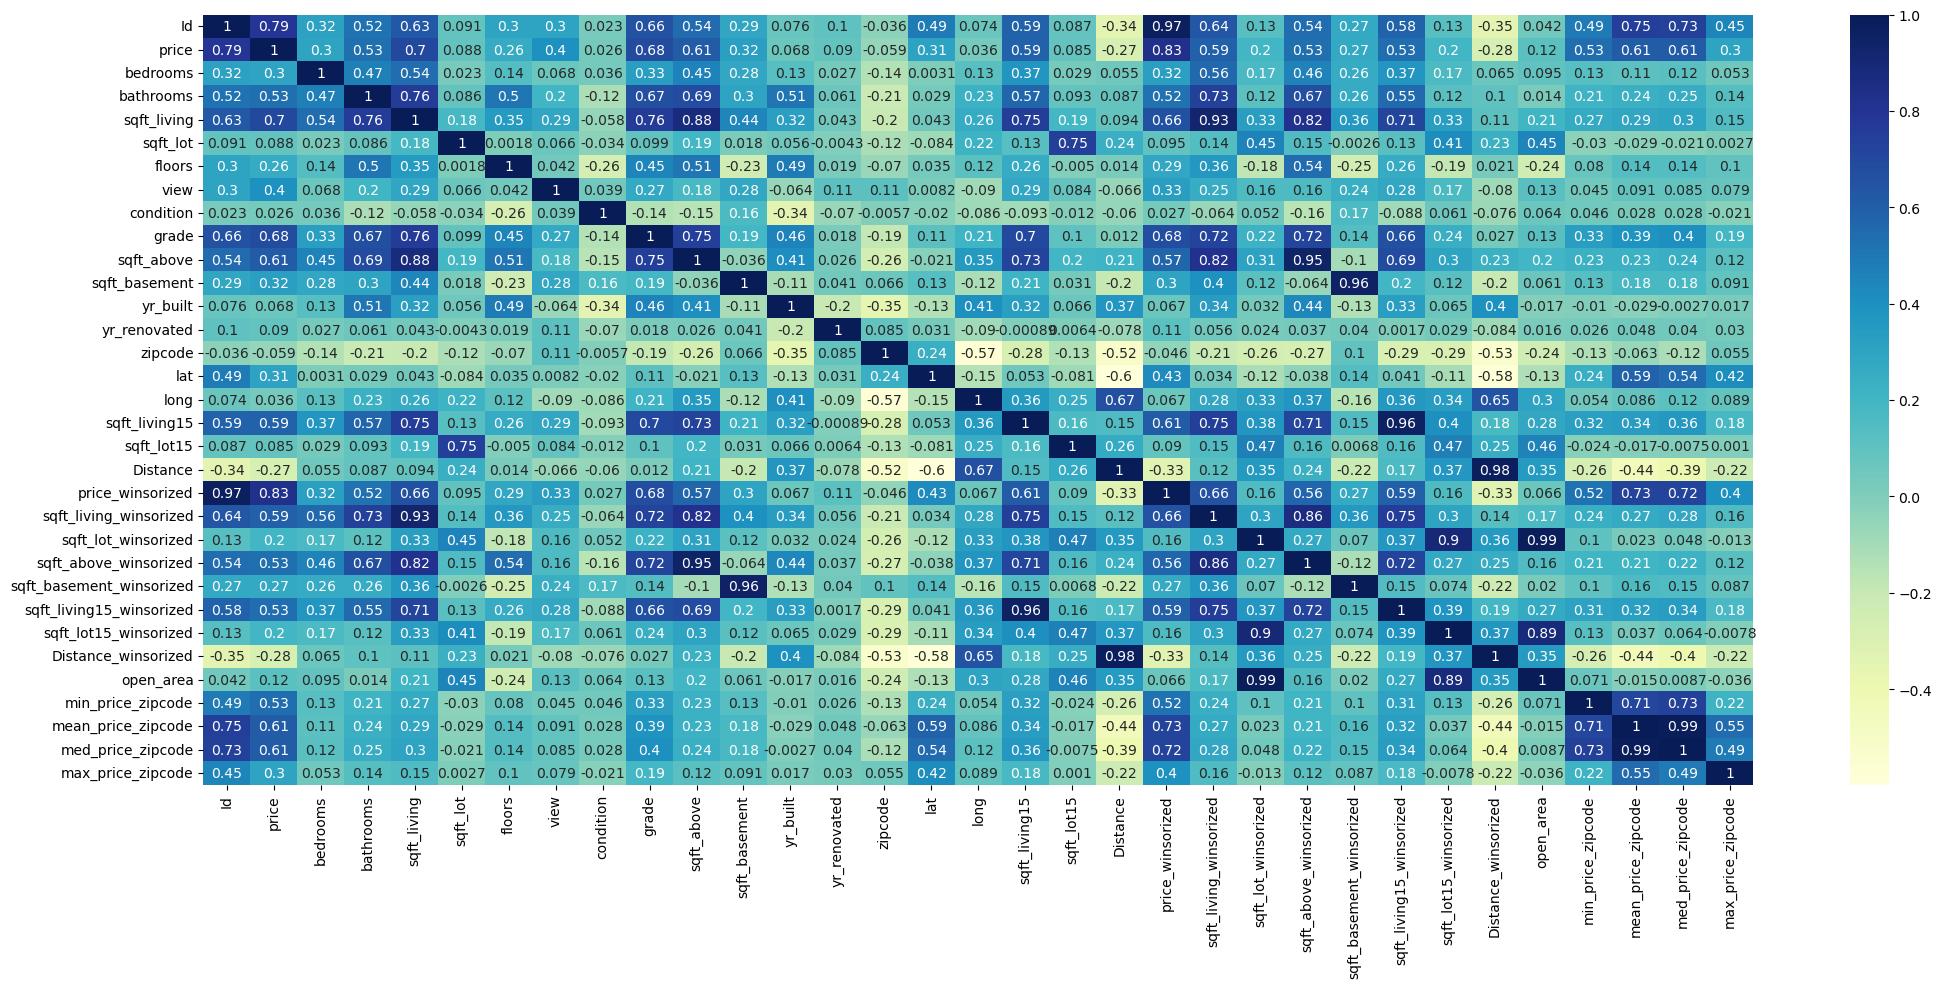

In [52]:
# Correlation Heat Map
plt.figure(figsize = (25, 10))
sns.heatmap(house_price.corr(), annot = True, cmap = "YlGnBu")
plt.show()

Inference: new variables created have a very good correlation with (price)

### Bedrooms -  Impute Zeros

<AxesSubplot:xlabel='bedrooms', ylabel='price_winsorized'>

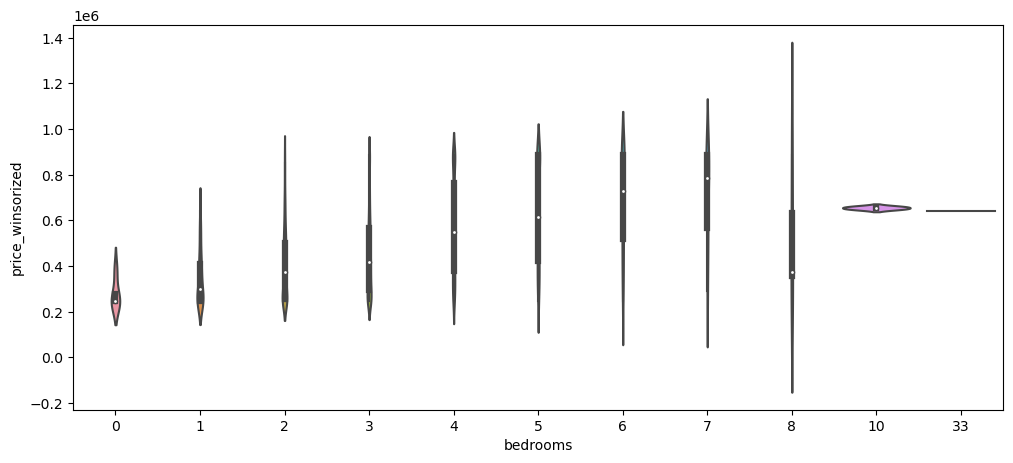

In [53]:
# Violin Plot of Bedrooms vs Price

plt.figure(figsize = (12, 5))
sns.violinplot(x = "bedrooms", y = "price_winsorized",data = house_price)

In [54]:
# fix the Bathrooms and Bedrooms
house_price.groupby('bedrooms')['price_winsorized'].describe()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0,4.0,278750.000000,67500.000000,245000.0,245000.0,245000.0,278750.0,380000.0
1,57.0,343041.140351,113974.935688,245000.0,245000.0,299000.0,410000.0,641500.0
2,685.0,406793.858394,154359.083931,245000.0,257000.0,374950.0,500000.0,887500.0
3,2212.0,455993.262206,186118.113195,245000.0,295000.0,419000.0,567000.0,887500.0
4,1587.0,569944.089477,213512.557600,245000.0,380000.0,550000.0,762000.0,887500.0
5,380.0,627214.844737,222187.601883,245000.0,423712.5,613475.0,887500.0,887500.0
6,57.0,686754.210526,213188.219387,245000.0,516250.0,730000.0,887500.0,887500.0
7,12.0,712646.666667,201599.821308,291000.0,566250.0,785000.0,884900.0,887500.0
8,3.0,533500.000000,307016.693357,340000.0,356500.0,373000.0,630250.0,887500.0


**Replacing 4 with 6 as the max price is 887500 & and its standard deviation is almost same.**

Note: We will drop 33 from bedrooms as the price is same across and the standard deviation is 0.

In [55]:
# Replacing 4 with 6
house_price.loc[house_price.bedrooms==4, "bedrooms"]=6

In [56]:
house_price.loc[house_price.bedrooms==10]

,Id,Date,price,bedrooms,Bedroom Category,bathrooms,Bathroom group,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Distance,Expensive,price_winsorized,sqft_living_winsorized,sqft_lot_winsorized,sqft_above_winsorized,sqft_basement_winsorized,sqft_living15_winsorized,sqft_lot15_winsorized,Distance_winsorized,open_area,min_price_zipcode,mean_price_zipcode,med_price_zipcode,max_price_zipcode
1354,16324,20141029T000000,650000,10,10,2.0,>=2 & <=3,3610,11914,2.0,NO,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,7.801339,NO,650000,3236,11914,2960,600,2040,11914,7.801339,8678,331500,736694.433628,815000.0,887500
3382,16547,20141229T000000,660000,10,10,3.0,>3 & <4.75,2920,3745,2.0,NO,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,4.097233,NO,660000,2920,3745,1860,950,1810,3745,4.097233,825,433000,711909.549020,672324.0,887500


In [57]:
house_price.loc[house_price.bedrooms==33]

,Id,Date,price,bedrooms,Bedroom Category,bathrooms,Bathroom group,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Distance,Expensive,price_winsorized,sqft_living_winsorized,sqft_lot_winsorized,sqft_above_winsorized,sqft_basement_winsorized,sqft_living15_winsorized,sqft_lot15_winsorized,Distance_winsorized,open_area,min_price_zipcode,mean_price_zipcode,med_price_zipcode,max_price_zipcode
3814,16133,20140625T000000,640000,33,33,1.75,<2,1620,6000,1.0,NO,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,5.72318,NO,640000,1620,6000,1040,580,1330,4700,5.72318,4380,245000,576665.582192,556000.0,887500


In [58]:
# Three Rows - 1356, 3384 and 3816 have bedrooms==10 & 33
rows = [1354, 3382, 3814]
house_price = house_price.drop(rows) # Dropped the Rows

In [61]:
# Lets Check the Statistical Summary again

house_price.groupby('bedrooms')['price_winsorized'].describe()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0,4.0,278750.000000,67500.000000,245000.0,245000.0,245000.0,278750.0,380000.0
1,57.0,343041.140351,113974.935688,245000.0,245000.0,299000.0,410000.0,641500.0
2,685.0,406793.858394,154359.083931,245000.0,257000.0,374950.0,500000.0,887500.0
3,2212.0,455993.262206,186118.113195,245000.0,295000.0,419000.0,567000.0,887500.0
5,380.0,627214.844737,222187.601883,245000.0,423712.5,613475.0,887500.0,887500.0
6,1644.0,573994.075426,214504.320547,245000.0,384500.0,555000.0,775250.0,887500.0
7,12.0,712646.666667,201599.821308,291000.0,566250.0,785000.0,884900.0,887500.0
8,3.0,533500.000000,307016.693357,340000.0,356500.0,373000.0,630250.0,887500.0


<AxesSubplot:xlabel='bedrooms', ylabel='price_winsorized'>

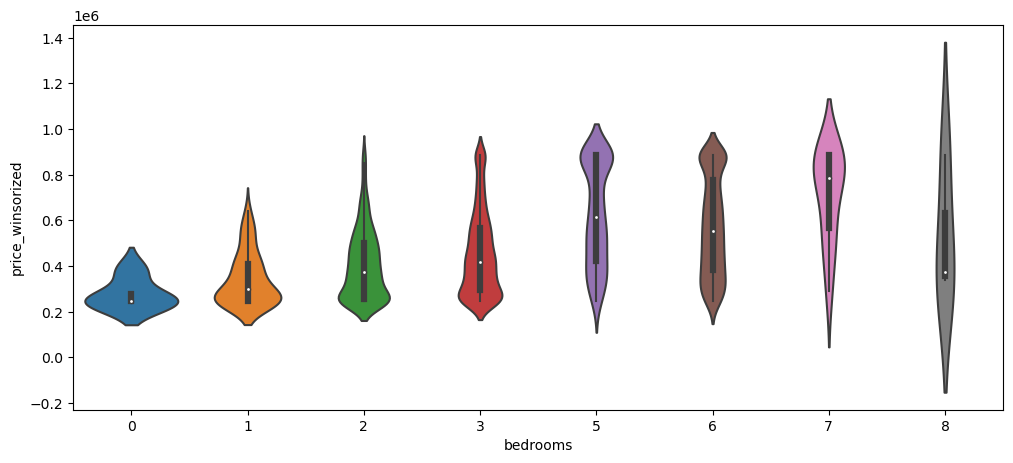

In [62]:
# recreating the Violin Plot
plt.figure(figsize = (12, 5))
sns.violinplot(x = "bedrooms", y = "price_winsorized",data = house_price)

### Impute 0s in Bathrooms

In [63]:
# converting the bathrooms in round numbers

house_price["bathrooms"] = np.round(house_price.bathrooms, 0)

In [64]:
house_price.loc[house_price.bathrooms==0]

,Id,Date,price,bedrooms,Bedroom Category,bathrooms,Bathroom group,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Distance,Expensive,price_winsorized,sqft_living_winsorized,sqft_lot_winsorized,sqft_above_winsorized,sqft_basement_winsorized,sqft_living15_winsorized,sqft_lot15_winsorized,Distance_winsorized,open_area,min_price_zipcode,mean_price_zipcode,med_price_zipcode,max_price_zipcode
1393,7971,20150205T000000,380000,0,5-7,0.0,<2,1470,979,3.0,NO,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,7.632287,YES,380000,1470,3192,1470,0,1470,3600,7.632287,1722,245000,377054.676471,369993.5,734000
1500,132,20150413T000000,139950,0,0-4,0.0,<2,844,4269,1.0,NO,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600,22.928630,NO,245000,1080,4269,960,0,1380,9600,21.018942,3189,245000,290316.588235,257000.0,850000
3827,1798,20141223T000000,235000,0,5-7,0.0,<2,1470,4800,2.0,NO,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,24.223758,NO,245000,1470,4800,1470,0,1260,7200,21.018942,3330,245000,520804.971014,515000.0,887500


<AxesSubplot:xlabel='bathrooms', ylabel='price_winsorized'>

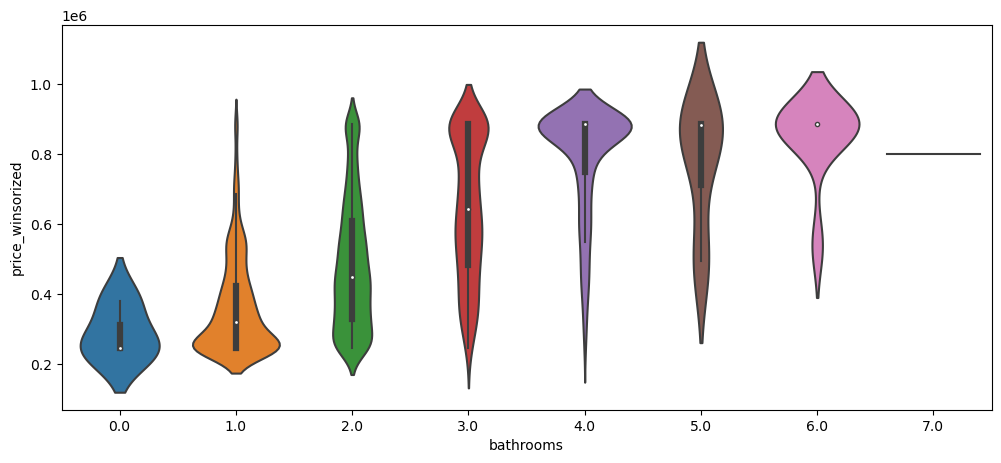

In [65]:
# Creating Violin Plot
plt.figure(figsize = (12, 5))
sns.violinplot(x = "bathrooms", y = "price_winsorized",data = house_price)

In [66]:
house_price.groupby("bathrooms")["price_winsorized"].describe()

,count,mean,std,min,25%,50%,75%,max
bathrooms,,,,,,,,
0.0,3.0,290000.000000,77942.286341,245000.0,245000.0,245000.0,312500.0,380000.0
1.0,956.0,363342.321130,138956.160853,245000.0,245000.0,320000.0,425000.0,887500.0
2.0,3148.0,486677.980940,186533.209337,245000.0,330000.0,450000.0,609962.5,887500.0
3.0,584.0,645554.909247,201513.877203,245000.0,485000.0,644000.0,887500.0,887500.0
4.0,288.0,792295.086806,154310.209781,248000.0,748750.0,887500.0,887500.0,887500.0
5.0,8.0,775850.000000,176881.413059,495000.0,712125.0,884900.0,887500.0,887500.0
6.0,9.0,848888.888889,115833.333333,540000.0,887500.0,887500.0,887500.0,887500.0
7.0,1.0,800000.000000,NaN,800000.0,800000.0,800000.0,800000.0,800000.0


Note: We will drop the 7th Category of Bathrooms as there are not enough observations and the standard deviation is 0

In [67]:
house_price.groupby("bathrooms")["price_winsorized"].describe()

,count,mean,std,min,25%,50%,75%,max
bathrooms,,,,,,,,
0.0,3.0,290000.000000,77942.286341,245000.0,245000.0,245000.0,312500.0,380000.0
1.0,956.0,363342.321130,138956.160853,245000.0,245000.0,320000.0,425000.0,887500.0
2.0,3148.0,486677.980940,186533.209337,245000.0,330000.0,450000.0,609962.5,887500.0
3.0,584.0,645554.909247,201513.877203,245000.0,485000.0,644000.0,887500.0,887500.0
4.0,288.0,792295.086806,154310.209781,248000.0,748750.0,887500.0,887500.0,887500.0
5.0,8.0,775850.000000,176881.413059,495000.0,712125.0,884900.0,887500.0,887500.0
6.0,9.0,848888.888889,115833.333333,540000.0,887500.0,887500.0,887500.0,887500.0
7.0,1.0,800000.000000,NaN,800000.0,800000.0,800000.0,800000.0,800000.0


## 2. EDA to identify the need for any interaction variables

In [68]:
house_price.groupby(["waterfront", "view"])["price_winsorized"].describe()

count           mean            std       min       25%  \
waterfront view                                                             
NO         0     4479.0  477811.079929  196569.647766  245000.0  310000.0   
           1       71.0  621300.366197  192634.433187  255000.0  514500.0   
           2      216.0  663341.745370  208461.365375  245000.0  494125.0   
           3      135.0  707700.148148  200080.576940  280950.0  550000.0   
           4       59.0  831000.084746  114487.593442  400000.0  827500.0   
YES        2        1.0  887500.000000            NaN  887500.0  887500.0   
           3        4.0  712250.000000  122784.703173  615000.0  634875.0   
           4       32.0  759512.500000  194922.578096  357000.0  644000.0   

                      50%       75%       max  
waterfront view                                
NO         0     435000.0  600000.0  887500.0  
           1     590000.0  805000.0  887500.0  
           2     697500.0  887500.0  887500.0  
           3     799000.0  887500.0  887500.0  
           4     887500.0  887500.0  887500.0  
YES        2     887500.0  887500.0  887500.0  
           3     673250.0  750625.0  887500.0  
           4     887500.0  887500.0  887500.0

In [69]:
house_price["water_view_int"]=house_price.waterfront+"_"+house_price.view.astype("str")

<AxesSubplot:xlabel='water_view_int', ylabel='price_winsorized'>

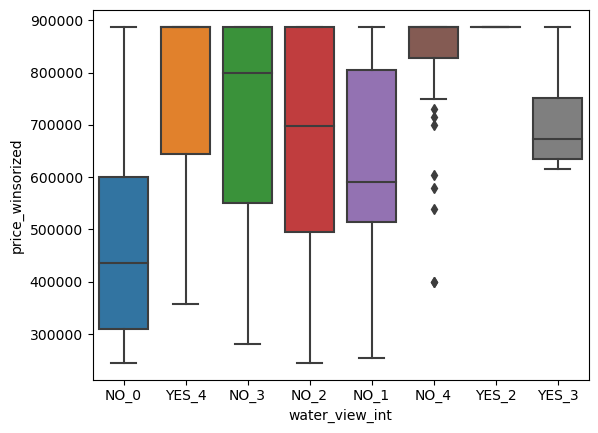

In [217]:
# visualize

sns.boxplot(x = "water_view_int", y = "price_winsorized", data = house_price)

#### Median Square-Feet = Median of Sqft House Area

In [70]:
# Median Sqr-Feet
house_price["median_sqft"] = house_price.loc[:, ['sqft_living_winsorized', 'sqft_lot_winsorized', 'sqft_above_winsorized', 
                                              'sqft_living15_winsorized', 'sqft_lot15_winsorized']].median(axis = 1)


In [71]:
house_price.loc[:, ["median_sqft", "price_winsorized"]].corr()

# new feature is positively correlated with price & correlation % is 67.39.

,median_sqft,price_winsorized
median_sqft,1.000000,0.674116
price_winsorized,0.674116,1.000000


Conclusion:
 
* Concatenate Waterfront & View to create 1 variable (_Interaction Variable_)

* Another Interaction Variable Created is Median_Sqft which is median of all the features powering Square feet info in the dataset

* We also notice that the median_sqft created has a very strong correlation with the target variable

## 3. Create additional variables as required (including dummy variables) 

* Created Distance Category & Converted them in Numeric used Label Encoding

* Dropped Unnecessary Variables

* Applied one Hot encoding on Waterfront and Expensive

In [72]:
house_price.head()

,Id,Date,price,bedrooms,Bedroom Category,bathrooms,Bathroom group,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Distance,Expensive,price_winsorized,sqft_living_winsorized,sqft_lot_winsorized,sqft_above_winsorized,sqft_basement_winsorized,sqft_living15_winsorized,sqft_lot15_winsorized,Distance_winsorized,open_area,min_price_zipcode,mean_price_zipcode,med_price_zipcode,max_price_zipcode,water_view_int,median_sqft
0,3125,20150213T000000,269100,3,0-4,2.0,>=2 & <=3,2190,7904,2.0,NO,0,3,8,2190,0,1995,0,98092,47.2617,-122.210,2190,7669,24.422199,NO,269100,2190,7904,2190,0,2190,7669,21.018942,5714,245000,344266.823529,323750.0,725000,NO_0,2190.0
1,10559,20140516T000000,445000,3,0-4,2.0,>=2 & <=3,1990,7340,2.0,NO,0,3,8,1990,0,1984,0,98072,47.7579,-122.141,2180,11223,13.876083,NO,445000,1990,7340,1990,0,2180,11223,13.876083,5350,323000,536496.864407,530000.0,887500,NO_0,2180.0
2,8819,20140826T000000,400000,3,0-4,2.0,<2,1730,9211,1.0,NO,0,3,8,1730,0,1961,0,98125,47.7149,-122.322,1440,9211,7.615336,NO,400000,1730,9211,1730,0,1440,9211,7.615336,7481,290000,502893.344444,455600.0,887500,NO_0,1730.0
3,1197,20141226T000000,215000,6,0-4,2.0,>=2 & <=3,1900,9600,1.0,NO,0,4,7,1900,0,1967,0,98031,47.4208,-122.200,2040,9600,14.188716,NO,245000,1900,9600,1900,0,2040,9600,14.188716,7700,245000,316129.787234,295000.0,759600,NO_0,2040.0
4,16507,20140611T000000,657500,6,0-4,3.0,>=2 & <=3,4140,24190,2.0,NO,0,3,11,4140,0,2002,0,98092,47.3062,-122.150,3950,24190,22.370637,NO,657500,3236,19783,2960,0,2930,16350,21.018942,16547,245000,344266.823529,323750.0,725000,NO_0,3236.0


In [73]:
# Analyze the Distance

house_price.Distance.describe()

count    4997.000000
mean       11.298956
std         6.542132
min         0.719543
25%         5.971768
50%        10.176058
75%        15.347850
max        44.722912
Name: Distance, dtype: float64

In [74]:
# Binning refers to converting the numeric variable into categorycal variables.
def distance_cat(x):
    if x<=1:
        return("Proximity")
    elif x<=6.5:
        return("Close")
    elif x<=11:
        return("Far")
    else:
        return("Quite Far")

In [75]:
# new variable - Distance Category

house_price["Distance_Cat"] =house_price.Distance.apply(distance_cat)

In [76]:
# Label Encoding is applicable on Categories with Order...

labels  = {'Proximity':4, "Close":3, "Far":2, "Quite Far":1}

def labels(x):
    if x=="Proximity":
        return(4)
    elif x=="Close":
        return(3)
    elif x=="Far":
        return(2)
    else:
        return(1)

# Used dictionary to convert the Categorical into Numbers

# as the labels have a certain Order and therefore, we will use Label
# Encoding to encode the Variables

house_price["Distance_Cat"]=house_price.Distance_Cat.apply(labels)

In [77]:
house_price.head()

,Id,Date,price,bedrooms,Bedroom Category,bathrooms,Bathroom group,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Distance,Expensive,price_winsorized,sqft_living_winsorized,sqft_lot_winsorized,sqft_above_winsorized,sqft_basement_winsorized,sqft_living15_winsorized,sqft_lot15_winsorized,Distance_winsorized,open_area,min_price_zipcode,mean_price_zipcode,med_price_zipcode,max_price_zipcode,water_view_int,median_sqft,Distance_Cat
0,3125,20150213T000000,269100,3,0-4,2.0,>=2 & <=3,2190,7904,2.0,NO,0,3,8,2190,0,1995,0,98092,47.2617,-122.210,2190,7669,24.422199,NO,269100,2190,7904,2190,0,2190,7669,21.018942,5714,245000,344266.823529,323750.0,725000,NO_0,2190.0,1
1,10559,20140516T000000,445000,3,0-4,2.0,>=2 & <=3,1990,7340,2.0,NO,0,3,8,1990,0,1984,0,98072,47.7579,-122.141,2180,11223,13.876083,NO,445000,1990,7340,1990,0,2180,11223,13.876083,5350,323000,536496.864407,530000.0,887500,NO_0,2180.0,1
2,8819,20140826T000000,400000,3,0-4,2.0,<2,1730,9211,1.0,NO,0,3,8,1730,0,1961,0,98125,47.7149,-122.322,1440,9211,7.615336,NO,400000,1730,9211,1730,0,1440,9211,7.615336,7481,290000,502893.344444,455600.0,887500,NO_0,1730.0,2
3,1197,20141226T000000,215000,6,0-4,2.0,>=2 & <=3,1900,9600,1.0,NO,0,4,7,1900,0,1967,0,98031,47.4208,-122.200,2040,9600,14.188716,NO,245000,1900,9600,1900,0,2040,9600,14.188716,7700,245000,316129.787234,295000.0,759600,NO_0,2040.0,1
4,16507,20140611T000000,657500,6,0-4,3.0,>=2 & <=3,4140,24190,2.0,NO,0,3,11,4140,0,2002,0,98092,47.3062,-122.150,3950,24190,22.370637,NO,657500,3236,19783,2960,0,2930,16350,21.018942,16547,245000,344266.823529,323750.0,725000,NO_0,3236.0,1


<AxesSubplot:xlabel='Expensive', ylabel='price'>

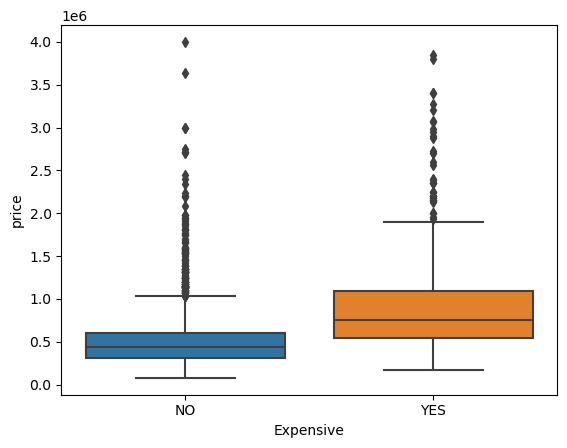

In [78]:
# Expensive
sns.boxplot(x = "Expensive", y = "price", data = house_price)

In [79]:
house_price.columns

Index(['Id', 'Date', 'price', 'bedrooms', 'Bedroom Category', 'bathrooms',
       'Bathroom group', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'Distance', 'Expensive', 'price_winsorized', 'sqft_living_winsorized',
       'sqft_lot_winsorized', 'sqft_above_winsorized',
       'sqft_basement_winsorized', 'sqft_living15_winsorized',
       'sqft_lot15_winsorized', 'Distance_winsorized', 'open_area',
       'min_price_zipcode', 'mean_price_zipcode', 'med_price_zipcode',
       'max_price_zipcode', 'water_view_int', 'median_sqft', 'Distance_Cat'],
      dtype='object')

In [80]:
# Droping Unnecessary Variables

finaldata = house_price.drop(['Date', "price", 'sqft_living', 'sqft_lot', 
                             'sqft_above','sqft_basement',
                             'yr_built', 'yr_renovated', 'zipcode', 'lat','Bedroom Category','Bathroom group', 'long',
                             'sqft_living15', 'sqft_lot15',
                             "Distance", 'sqft_living_winsorized', 'sqft_lot_winsorized',
                         'sqft_above_winsorized', 'sqft_basement_winsorized',
                         'sqft_living15_winsorized', 'sqft_lot15_winsorized'], axis = 1) # "medin_sqft"

In [81]:
finaldata.head()

,Id,bedrooms,bathrooms,floors,waterfront,view,condition,grade,Expensive,price_winsorized,Distance_winsorized,open_area,min_price_zipcode,mean_price_zipcode,med_price_zipcode,max_price_zipcode,water_view_int,median_sqft,Distance_Cat
0,3125,3,2.0,2.0,NO,0,3,8,NO,269100,21.018942,5714,245000,344266.823529,323750.0,725000,NO_0,2190.0,1
1,10559,3,2.0,2.0,NO,0,3,8,NO,445000,13.876083,5350,323000,536496.864407,530000.0,887500,NO_0,2180.0,1
2,8819,3,2.0,1.0,NO,0,3,8,NO,400000,7.615336,7481,290000,502893.344444,455600.0,887500,NO_0,1730.0,2
3,1197,6,2.0,1.0,NO,0,4,7,NO,245000,14.188716,7700,245000,316129.787234,295000.0,759600,NO_0,2040.0,1
4,16507,6,3.0,2.0,NO,0,3,11,NO,657500,21.018942,16547,245000,344266.823529,323750.0,725000,NO_0,3236.0,1


In [82]:
# Converted the eemaining Categories into Dummy Variables

dummy_var = pd.get_dummies(finaldata, drop_first = True)

dummy_var.head()

,Id,bedrooms,bathrooms,floors,view,condition,grade,price_winsorized,Distance_winsorized,open_area,min_price_zipcode,mean_price_zipcode,med_price_zipcode,max_price_zipcode,median_sqft,Distance_Cat,waterfront_YES,Expensive_YES,water_view_int_NO_1,water_view_int_NO_2,water_view_int_NO_3,water_view_int_NO_4,water_view_int_YES_2,water_view_int_YES_3,water_view_int_YES_4
0,3125,3,2.0,2.0,0,3,8,269100,21.018942,5714,245000,344266.823529,323750.0,725000,2190.0,1,0,0,0,0,0,0,0,0,0
1,10559,3,2.0,2.0,0,3,8,445000,13.876083,5350,323000,536496.864407,530000.0,887500,2180.0,1,0,0,0,0,0,0,0,0,0
2,8819,3,2.0,1.0,0,3,8,400000,7.615336,7481,290000,502893.344444,455600.0,887500,1730.0,2,0,0,0,0,0,0,0,0,0
3,1197,6,2.0,1.0,0,4,7,245000,14.188716,7700,245000,316129.787234,295000.0,759600,2040.0,1,0,0,0,0,0,0,0,0,0
4,16507,6,3.0,2.0,0,3,11,657500,21.018942,16547,245000,344266.823529,323750.0,725000,3236.0,1,0,0,0,0,0,0,0,0,0


### 4. Fit a regression equation with House Prices as the Dependent variable (4 marks)

In [83]:
# Build the Model

X = dummy_var.drop("price_winsorized", axis = 1) # List of all the Predictors
y = dummy_var.price_winsorized

import statsmodels.api as sma
X = sma.add_constant(X)

model = sma.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_winsorized   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     5407.
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        10:58:41   Log-Likelihood:                -60357.
No. Observations:                4997   AIC:                         1.208e+05
Df Residuals:                    4975   BIC:                         1.209e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.167e+04   1.04e+04      6.915      0.000    5.13e+04     9.2e+04
Id                      29.2539      0.233    125.777      0.000      28.798      29.710
bedrooms              -323.6151    462.263     -0.700      0.484   -1229.855     582.624
bathrooms             3089.6845   1086.387      2.844      0.004     959.886    5219.483
floors               -5168.4441   1404.781     -3.679      0.000   -7922.433   -2414.455
view                  1.092e+04   2737.579      3.990      0.000    5557.078    1.63e+04
condition             2015.1088   1001.119      2.013      0.044      52.475    3977.743
grade                 8015.4685    880.426      9.104      0.000    6289.445    9741.492
Distance_winsorized    203.2875    251.730      0.808      0.419    -290.214     696.789
open_area                0.3490      0.151      2.309      0.021       0.053       0.645
min_price_zipcode        0.1196      0.013      9.050      0.000       0.094       0.145
mean_price_zipcode      -0.0840      0.036     -2.338      0.019      -0.154      -0.014
med_price_zipcode        0.0980      0.030      3.246      0.001       0.039       0.157
max_price_zipcode       -0.0543      0.007     -8.197      0.000      -0.067      -0.041
median_sqft             14.9551      1.798      8.316      0.000      11.429      18.481
Distance_Cat          7271.5602   1599.623      4.546      0.000    4135.594    1.04e+04
waterfront_YES       -5296.6518   1.19e+04     -0.444      0.657   -2.87e+04    1.81e+04
Expensive_YES        -5595.0937   7465.363     -0.749      0.454   -2.02e+04    9040.310
water_view_int_NO_1  -1.145e+04   6028.302     -1.899      0.058   -2.33e+04     371.097
water_view_int_NO_2   2177.5365   3664.010      0.594      0.552   -5005.539    9360.613
water_view_int_NO_3  -9122.2104   3698.997     -2.466      0.014   -1.64e+04   -1870.546
water_view_int_NO_4   1.809e+04   4902.559      3.691      0.000    8482.088    2.77e+04
water_view_int_YES_2  1.042e+04   3.02e+04      0.345      0.730   -4.89e+04    6.97e+04
water_view_int_YES_3 -1.504e+04   1.91e+04     -0.787      0.431   -5.25e+04    2.24e+04
water_view_int_YES_4  -677.0095   1.13e+04     -0.060      0.952   -2.28e+04    2.14e+04
==============================================================================
Omnibus:                      381.274   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.749
Skew:                           0.755   Prob(JB):                    8.12e-104
Kurtosis:                       2.985   Cond. No.                     1.17e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest 

### Inference of the Above Model:

**R Squared** value is 95.8% & adjusted R Squared is also 95.8%. Means 95.8 % variation in price is explained by the Predictors.

*F Test*(P Value) suggests that the model is a significant model.
* As Autocorrelation of Errors of **Durbin Watson Test Statistic is 2.016**. If the DW test value is around 2, it represents there are no autocorrelation of errors.


### 5. What is the maximum R2 and adjusted R2 possible will all variables in the equation significant at alpha = 0.10? (4 marks)

* **R Squared** value is 95.8% where & adjusted R Squared is also 95.8%. Means 95.8% variation in price is explained by the Predictors.

The Maximum R2 Value can be 1 and Minimium value can be 0. Even at alpha at 10%, our model's maximum R Squared Value is 95.8% with Adjusted R Squared Value also 95.8%.  

### 6. What is the impact of Water Front and View on House Prices? (4 marks)

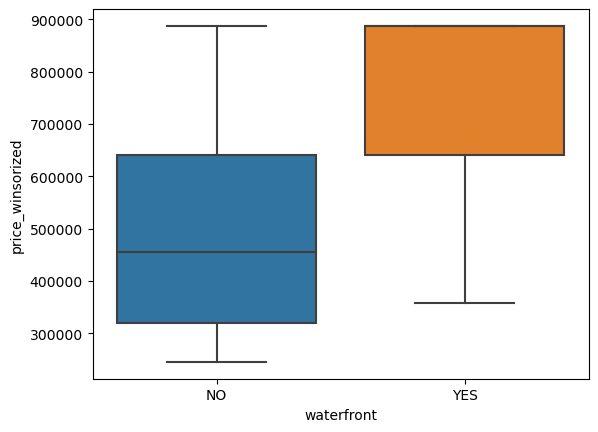

In [84]:
# visualise the Water Front & price

sns.boxplot(x="waterfront",y = "price_winsorized", data = house_price)
plt.show()

Conclusion: It is clearly visible that waterfront houses are expensive.

Now We will perform **Two Sample Independent T Test** to validate the above results.

In [85]:
# Creating Two Samples Yes and No with house prices with/without waterfront

yes = house_price.loc[house_price.waterfront=="YES", "price"]
no = house_price.loc[house_price.waterfront=="NO", "price"]

In [86]:
# Two Sample Independent T Test to verify the results.
import scipy.stats as stats

# Ho: Price has no relation with waterfront
# Ha: Ho is False,  means there is relation with dependent variable

stats.ttest_ind(yes, no) # Test stats, pvalue


# If the Pvalue<0.05, Reject the Ho. However, If the Pvalue>0.05, We fail to reject the Ho
# Conclusion: Prices are dependent on the fact whether the house is Waterfront facing or not.

Ttest_indResult(statistic=19.133265986551788, pvalue=8.293454750476724e-79)

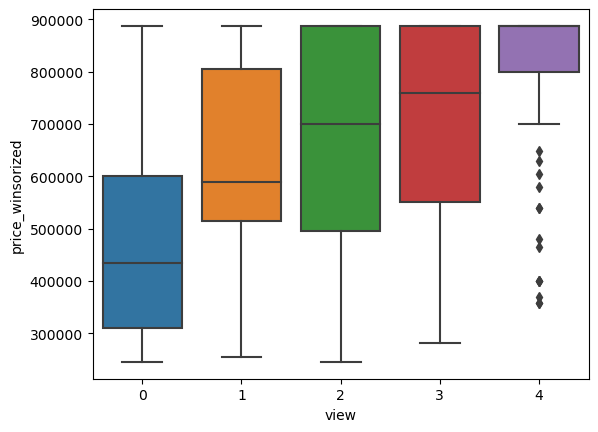

In [87]:
# visualise the view and price

sns.boxplot(x="view",y = "price_winsorized", data = house_price)
plt.show()

#### Conclusion:

We can clearly see that the view Category 4 is costlier than the rest. It indicates that the different views have different prices.


In [106]:
# # Importing Data

# house_price_final = pd.read_excel("C:/Users/10553/OneDrive - Indian School of Business/Desktop/SA-2 Final/SA2_Q8-10.xlsx")

# print(house_price_final.shape)

(5000, 13)


In [108]:
# Anova


import statsmodels.formula.api as sfa
model = sfa.ols("price_winsorized~view", data = house_price).fit()


# Ho:  View and the Prices are Independent of Each other. Mean prices(View 1) = mean prices(View 2) and so on.
# Ha: View & Prices are Related. Means Prices are influenced on the View 

# Anova
from statsmodels.stats.anova import anova_lm

anova_lm(model)

# Conclusion: Since the Pvalue < 0.05, We reject Ho which means 
# view is an essential variable in deciding House Price


,df,sum_sq,mean_sq,F,PR(>F)
view,1.0,2.323493e+13,2.323493e+13,601.753005,1.439035e-125
Residual,4995.0,1.928673e+14,3.861207e+10,NaN,NaN


### 7. Is there any Multicollinearity?

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_winsorized   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     601.8
Date:                Sun, 21 May 2023   Prob (F-statistic):          1.44e-125
Time:                        10:59:06   Log-Likelihood:                -67995.
No. Observations:                4997   AIC:                         1.360e+05
Df Residuals:                    4995   BIC:                         1.360e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.788e+05   2915.216    164.234      0.000    4.73e+05    4.84e+05
view        8.372e+04   3412.849     24.531      0.000     7.7e+04    9.04e+04
==============================================================================
Omnibus:                      408.636   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.217
Skew:                           0.554   Prob(JB):                     5.95e-74
Kurtosis:                       2.372   Cond. No.                         1.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
# vif always Calculated between Predictors only
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_list = []

for i in range(X.shape[1]):
    vif_list.append(variance_inflation_factor(dummy_var.values, i)) # vif: 1/(1-R2)

In [94]:
vif = pd.DataFrame({"Features":X.columns, 
              "VIF": vif_list}).sort_values(by="VIF", ascending=False)

# VIF should be less than 10
# If the VIF > 10, this means that the predictors are highly collinear

vif

,Features,VIF
24,water_view_int_YES_4,inf
23,water_view_int_YES_3,inf
22,water_view_int_YES_2,inf
4,floors,inf
21,water_view_int_NO_4,inf
20,water_view_int_NO_3,inf
19,water_view_int_NO_2,inf
18,water_view_int_NO_1,inf
17,Expensive_YES,inf
16,waterfront_YES,inf


In [105]:
vif.Features

24    water_view_int_YES_4
23    water_view_int_YES_3
22    water_view_int_YES_2
4                   floors
21     water_view_int_NO_4
20     water_view_int_NO_3
19     water_view_int_NO_2
18     water_view_int_NO_1
17           Expensive_YES
16          waterfront_YES
11      mean_price_zipcode
12       med_price_zipcode
7                    grade
6                condition
0                    const
13       max_price_zipcode
14             median_sqft
10       min_price_zipcode
5                     view
8      Distance_winsorized
15            Distance_Cat
2                 bedrooms
3                bathrooms
1                       Id
9                open_area
Name: Features, dtype: object

In [15]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [95]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
lr = LinearRegression()

In [96]:
sfs = SequentialFeatureSelector(estimator = lr, k_features = "best", scoring = "r2", 
                               cv = 5, forward = False)

In [97]:
sfs.fit(X, y)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 25), scoring='r2')

In [98]:
sfs.k_feature_names_

('Id',
 'bathrooms',
 'floors',
 'condition',
 'grade',
 'open_area',
 'min_price_zipcode',
 'mean_price_zipcode',
 'med_price_zipcode',
 'max_price_zipcode',
 'median_sqft',
 'Distance_Cat',
 'Expensive_YES',
 'water_view_int_NO_1',
 'water_view_int_NO_4',
 'water_view_int_YES_4')

In [99]:
# Model after Sequential Feature Selector & VIF

model = sma.OLS(y, sma.add_constant(X.loc[:, sfs.k_feature_names_])).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_winsorized   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     7102.
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        11:00:13   Log-Likelihood:                -60358.
No. Observations:                4997   AIC:                         1.207e+05
Df Residuals:                    4980   BIC:                         1.209e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.533e+04   8940.055      8.427      0.000    5.78e+04    9.29e+04
Id                      29.2193      0.231    126.671      0.000      28.767      29.671
bathrooms             2985.5713   1074.356      2.779      0.005     879.360    5091.782
floors               -5058.4323   1395.575     -3.625      0.000   -7794.375   -2322.490
condition             1978.1513    998.914      1.980      0.048      19.839    3936.464
grade                 8045.6165    878.865      9.155      0.000    6322.653    9768.580
open_area                0.3578      0.150      2.380      0.017       0.063       0.653
min_price_zipcode        0.1196      0.013      9.069      0.000       0.094       0.145
mean_price_zipcode      -0.0908      0.035     -2.618      0.009      -0.159      -0.023
med_price_zipcode        0.1035      0.029      3.522      0.000       0.046       0.161
max_price_zipcode       -0.0535      0.007     -8.176      0.000      -0.066      -0.041
median_sqft             14.7179      1.702      8.645      0.000      11.380      18.056
Distance_Cat          6256.9217    947.629      6.603      0.000    4399.152    8114.692
Expensive_YES         1.835e+04   2481.015      7.398      0.000    1.35e+04    2.32e+04
water_view_int_NO_1  -2.449e+04   5569.381     -4.397      0.000   -3.54e+04   -1.36e+04
water_view_int_NO_4   3.802e+04   6045.484      6.289      0.000    2.62e+04    4.99e+04
water_view_int_YES_4  1.404e+04   7923.654      1.772      0.076   -1491.583    2.96e+04
==============================================================================
Omnibus:                      382.921   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              477.244
Skew:                           0.757   Prob(JB):                    2.33e-104
Kurtosis:                       2.983   Cond. No.                     1.70e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""